In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

import matplotlib.pyplot as plt

In [2]:
BANK_DF = pd.read_csv("BankChurners.csv")
BANK_DF = BANK_DF.drop("CLIENTNUM", axis=1)
BANK_DF = BANK_DF.iloc[:, :-2]

In [3]:
BANK_DF.head()
#BANK_DF.info()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
non_numeric_cols = BANK_DF.select_dtypes(include="object").columns

In [5]:
for column in non_numeric_cols:
    le=LabelEncoder()
    BANK_DF[column]=le.fit_transform(BANK_DF[column])

In [6]:
X=BANK_DF.drop("Attrition_Flag", axis=1)
y=BANK_DF["Attrition_Flag"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [8]:
rf_mod= RandomForestClassifier( random_state=12).fit(X_train, y_train)

In [9]:
rf_pred = rf_mod.predict(X_test)

In [10]:
accuracy_score(y_test, rf_pred)

0.9669299111549852

In [11]:
confusion_matrix(y_test, rf_pred)

array([[ 270,   50],
       [  17, 1689]], dtype=int64)

In [12]:
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9669299111549852
Precision: 0.9712478435882691
Recall: 0.9900351699882767


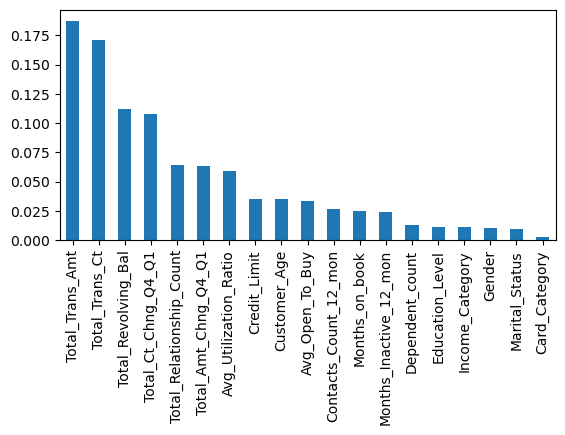

In [20]:
feature_importances = pd.Series(rf_mod.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar();
plt.subplots_adjust(bottom= 0.40)

plt.savefig('RF_featureimp.pdf')